In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, sys
import glob

In [3]:
file_date = '2019-08-19-130838'

In [4]:
print(os.getcwd())
Agent_1_interaction_data_files = glob.glob('../SHARCNET/Results/multi/big_collision_model/original/PLA_LED_Multi/'+file_date+'/log/*.csv')
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/multi/big_collision_model/original/PLA_LED_Multi/2019-08-19-130838/log\\2019-08-19.csv',
 '../SHARCNET/Results/multi/big_collision_model/original/PLA_LED_Multi/2019-08-19-130838/log\\2019-08-20.csv']

In [5]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(44880, 4)
(55120, 4)


In [6]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [7]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_raw.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

ValueError: Shape of passed values is (100000, 11), indices imply (100000, 168)

In [ ]:
Agent_1_action_df

In [ ]:
for i in range(24):
    plt.figure()
    col_name = 'light_node#'+str(i+1)
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col_name],'.')
    plt.title(col_name)
    

## Visitor activities

In [4]:
import re
# Process log
visitor_log_file = glob.glob("../SHARCNET/Results/multi/big_collision_model/original/PLA_LED_Multi/"+file_date+"/*.out")
print(visitor_log_file)
for log_file in visitor_log_file:
    f_in = open(log_file, "r")

f_out = open("../SHARCNET/Results/multi/big_collision_model/original/PLA_LED_Multi/"+file_date+"/visitor_log.csv","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# save into CSV
title = "Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,"+ \
        "Location_x_2,Location_y_2,Location_z_2,Destination_x_2,Destination_y_2,Destination_z_2,Distance_2,"+ \
        "Location_x_3,Location_y_3,Location_z_3,Destination_x_3,Destination_y_3,Destination_z_3,Distance_3,"+ \
        "Location_x_4,Location_y_4,Location_z_4,Destination_x_4,Destination_y_4,Destination_z_4,Distance_4,"+ \
        "Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5"+"\n"
f_out.write(title)
for line in f_in:
    if line.strip():# not empty line    
        
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None:
            f_out.write(line.replace('(','').replace(')',''))
        
f_in.close()
f_out.close()

['../SHARCNET/Results/multi/big_collision_model/original/PLA_LED_Multi/2019-08-19-130838\\s_multi_pla_18494647ob.out']


### 1. Position

In [8]:
visitor_data = pd.read_csv("../SHARCNET/Results/multi/big_collision_model/original/PLA_LED_Multi/"+file_date+"/visitor_log.csv", sep=',')
print(visitor_data.shape)

(2449999, 36)


In [9]:
visitor_data.shape

(2449999, 36)

In [7]:
visitor_data.head()

,Time,Location_x_1,Location_y_1,Location_z_1,Destination_x_1,Destination_y_1,Destination_z_1,Distance_1,Location_x_2,Location_y_2,...,Destination_y_4,Destination_z_4,Distance_4,Location_x_5,Location_y_5,Location_z_5,Destination_x_5,Destination_y_5,Destination_z_5,Distance_5
0,0.02,0.0,0.0,0.0,1.3,0.1,-5.7,0.0,0.0,0.0,...,0.1,-6.3,0.0,-0.1,1.0,0.2,-9.7,0.1,4.0,0.0
1,0.04,-0.1,0.0,0.3,1.3,0.1,-5.7,0.0,0.5,0.0,...,0.1,-6.3,0.0,-0.7,1.2,1.2,-9.7,0.1,4.0,0.0
2,0.06,-0.1,0.0,0.9,1.3,0.1,-5.7,0.0,0.9,0.0,...,0.1,-6.3,0.0,-1.1,1.3,2.0,-9.7,0.1,4.0,0.0
3,0.08,-0.1,0.0,1.2,1.3,0.1,-5.7,0.0,1.4,0.0,...,0.1,-6.3,0.0,-1.3,1.4,2.7,-9.7,0.1,4.0,0.0
4,0.10,-0.2,0.0,1.5,1.3,0.1,-5.7,0.0,1.9,0.0,...,0.1,-6.3,0.0,-1.6,1.5,3.4,-9.7,0.1,4.0,0.0


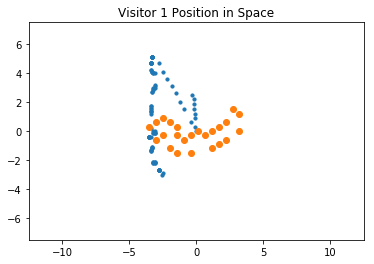

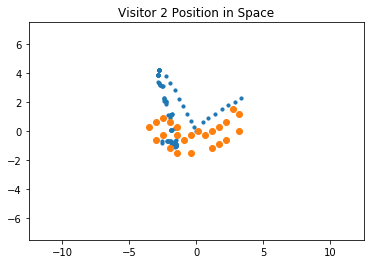

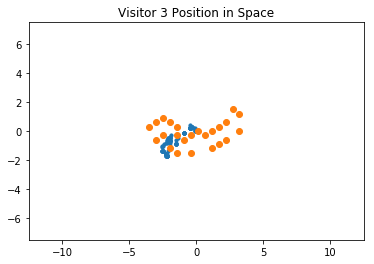

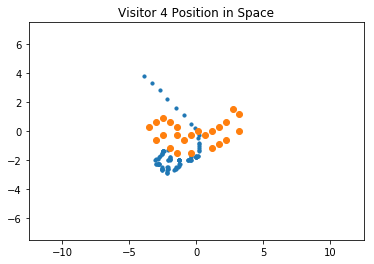

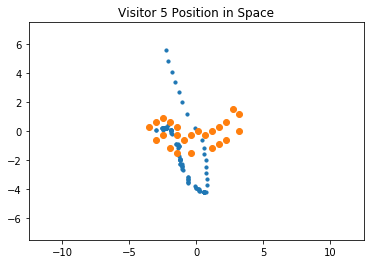

In [40]:
nodes_position = pd.read_csv("NodePosition.csv")

for i in range(1,6):
    plt.figure()
    plt.scatter(visitor_data['Location_x_' + str(i)], visitor_data['Location_z_' + str(i)], s=10)
    plt.xlim([-12.5,12.5])
    plt.ylim([-7.5,7.5])
    plt.title("Visitor "+ str(i) + " Position in Space")
    plt.scatter(nodes_position['x'], nodes_position['z'])

In [30]:
import seaborn
def heat_map(resolution, data_x, data_z):
    bins_x = np.linspace(-10,10,resolution[0]+1)
    bins_z = np.linspace(-5,5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (x_discretized[i],z_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu")
    ax.invert_yaxis()
    return activity_map


In [33]:
resolution = (10,10)

activity_map = heat_map(resolution,visitor_data['Location_x_1'],visitor_data['Location_z_1'])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [46]:
for i in range(1,6):
    print("\nVisitor {}".format(i))
    print("z maz {}".format(np.max(visitor_data['Location_z_'+str(i)])))
    print("z min {}".format(np.min(visitor_data['Location_z_'+str(i)])))
    print("x max {}".format(np.max(visitor_data['Location_x_'+str(i)])))
    print("x min {}".format(np.min(visitor_data['Location_x_'+str(i)])))


Visitor 1
z maz 14.7
z min -3.5
x max 3.3
x min -46.4

Visitor 2
z maz 22.8
z min -3.7
x max 25.4
x min -8.6

Visitor 3
z maz 2.5
z min -2.8
x max 3.7
x min -4.4

Visitor 4
z maz 23.8
z min -3.6
x max 25.4
x min -4.9

Visitor 5
z maz 25.3
z min -2.9
x max 26.0
x min -7.8


## IR detection

In [ ]:
ir_detection = pd.read_csv("IR_detection_area.csv")
ir_detection.head()

In [18]:
def is_inside_area(ir, point):
    signs = []
    for j in range(4):
        corner = ir[j*2:j*2+2]
        vector = corner - point
        edge = ir[8+j*2:8+j*2+2]
        signs.append(np.sign(np.cross(vector,edge)))
    
#     plt.plot(ir[:8][::2], ir[:8][1::2])
    if np.all(signs[0] == signs):
        #print("Inside")
        return True
    else:
        #print("Not inside")
        return False

In [46]:
columns = []
for i in range(5):
    for j in range(24):
        colname = "ir{}_v{}".format(j,i)
        columns.append(colname)
ir_detection_df = pd.DataFrame(columns=columns)


for index, row in visitor_data[:100].iterrows():
    is_inside = np.array([])
    for i in range(5):
        position = [row["Location_x_{}".format(i+1)], row["Location_z_{}".format(i+1)]]
        visitor_is_inside= np.zeros((24,))
        for j in range(24):
            visitor_is_inside[j] = is_inside_area(ir_detection.iloc[j], position)
        is_inside = np.append(is_inside, visitor_is_inside)
    ir_detection_df.loc[index] = is_inside

In [45]:
ir_detection_df.to_csv("visitor_IR_detection.csv", index=False)

In [1]:
import matplotlib.patches as patches
import matplotlib as mpl

def plot_scene(ax=None):
    nodes_position = pd.read_csv("NodePosition.csv")
    if ax is None:
        fig = plt.figure(figsize=(12.5,7.5))
        ax = fig.add_subplot(111)
    
    ir_coverages = []
    for i in range(nodes_position.shape[0]):
        ir = patches.Rectangle((-0.5,0), 1, 2, color="blue",  alpha=0.20)
        T = mpl.transforms.Affine2D().rotate_deg(-180+(360-nodes_position.iloc[i]['angle'])) + mpl.transforms.Affine2D().translate(nodes_position.iloc[i]['x'], nodes_position.iloc[i]['z']) + ax.transData
        ir.set_transform(T)
        ax.add_patch(ir)
    plt.scatter(nodes_position['x'], nodes_position['z'])
    plt.grid(True)
    plt.ylim(-7.5, 7.5)
    plt.xlim(-12.5,12.5)
    return ax

import seaborn
from matplotlib.colors import LogNorm
def heat_map(resolution, data_x, data_z, axe=None):
    bins_x = np.linspace(-12.5,12.5,resolution[0]+1)
    bins_z = np.linspace(-7.5,7.5,resolution[1]+1)
    x_discretized = pd.cut(data_x,bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    z_discretized = pd.cut(data_z,bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
    activity_map = np.zeros(resolution)
    for i in range(len(x_discretized)):
        position = (z_discretized[i],x_discretized[i])
        activity_map[position] += 1
    
    ax = seaborn.heatmap(activity_map, cmap="YlGnBu", ax=axe)
    ax.invert_yaxis()
    return activity_map, ax

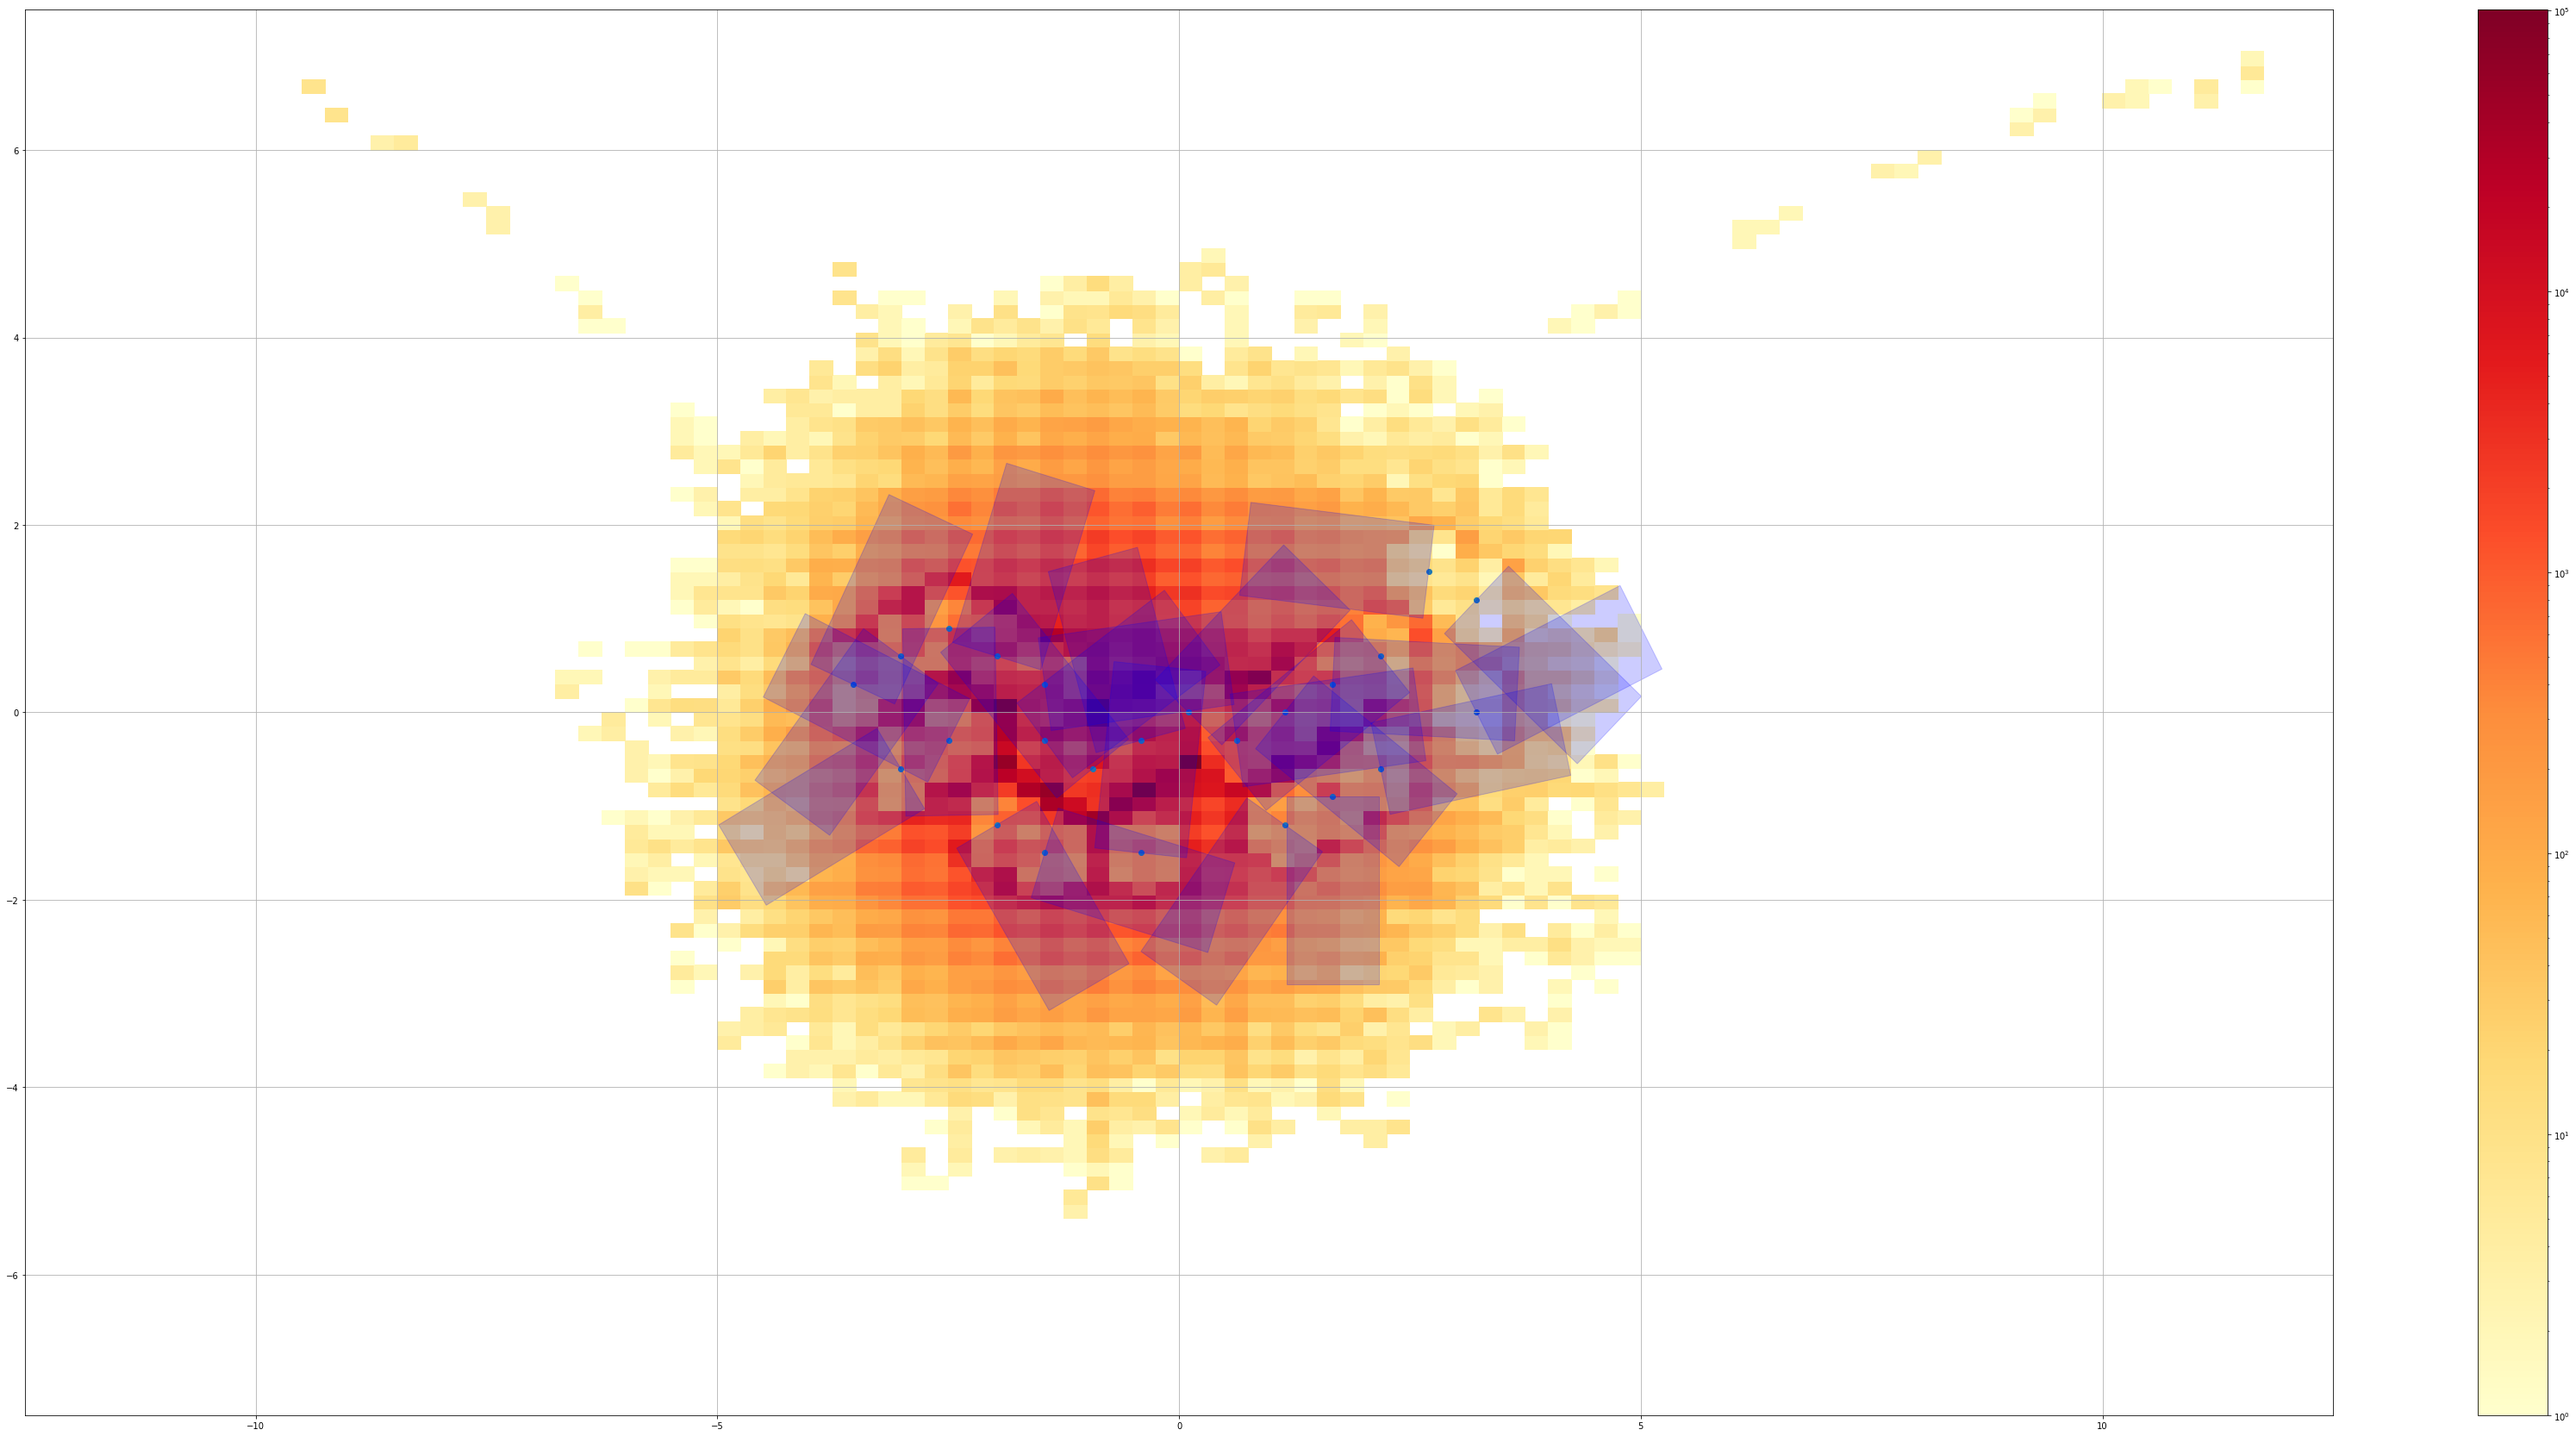

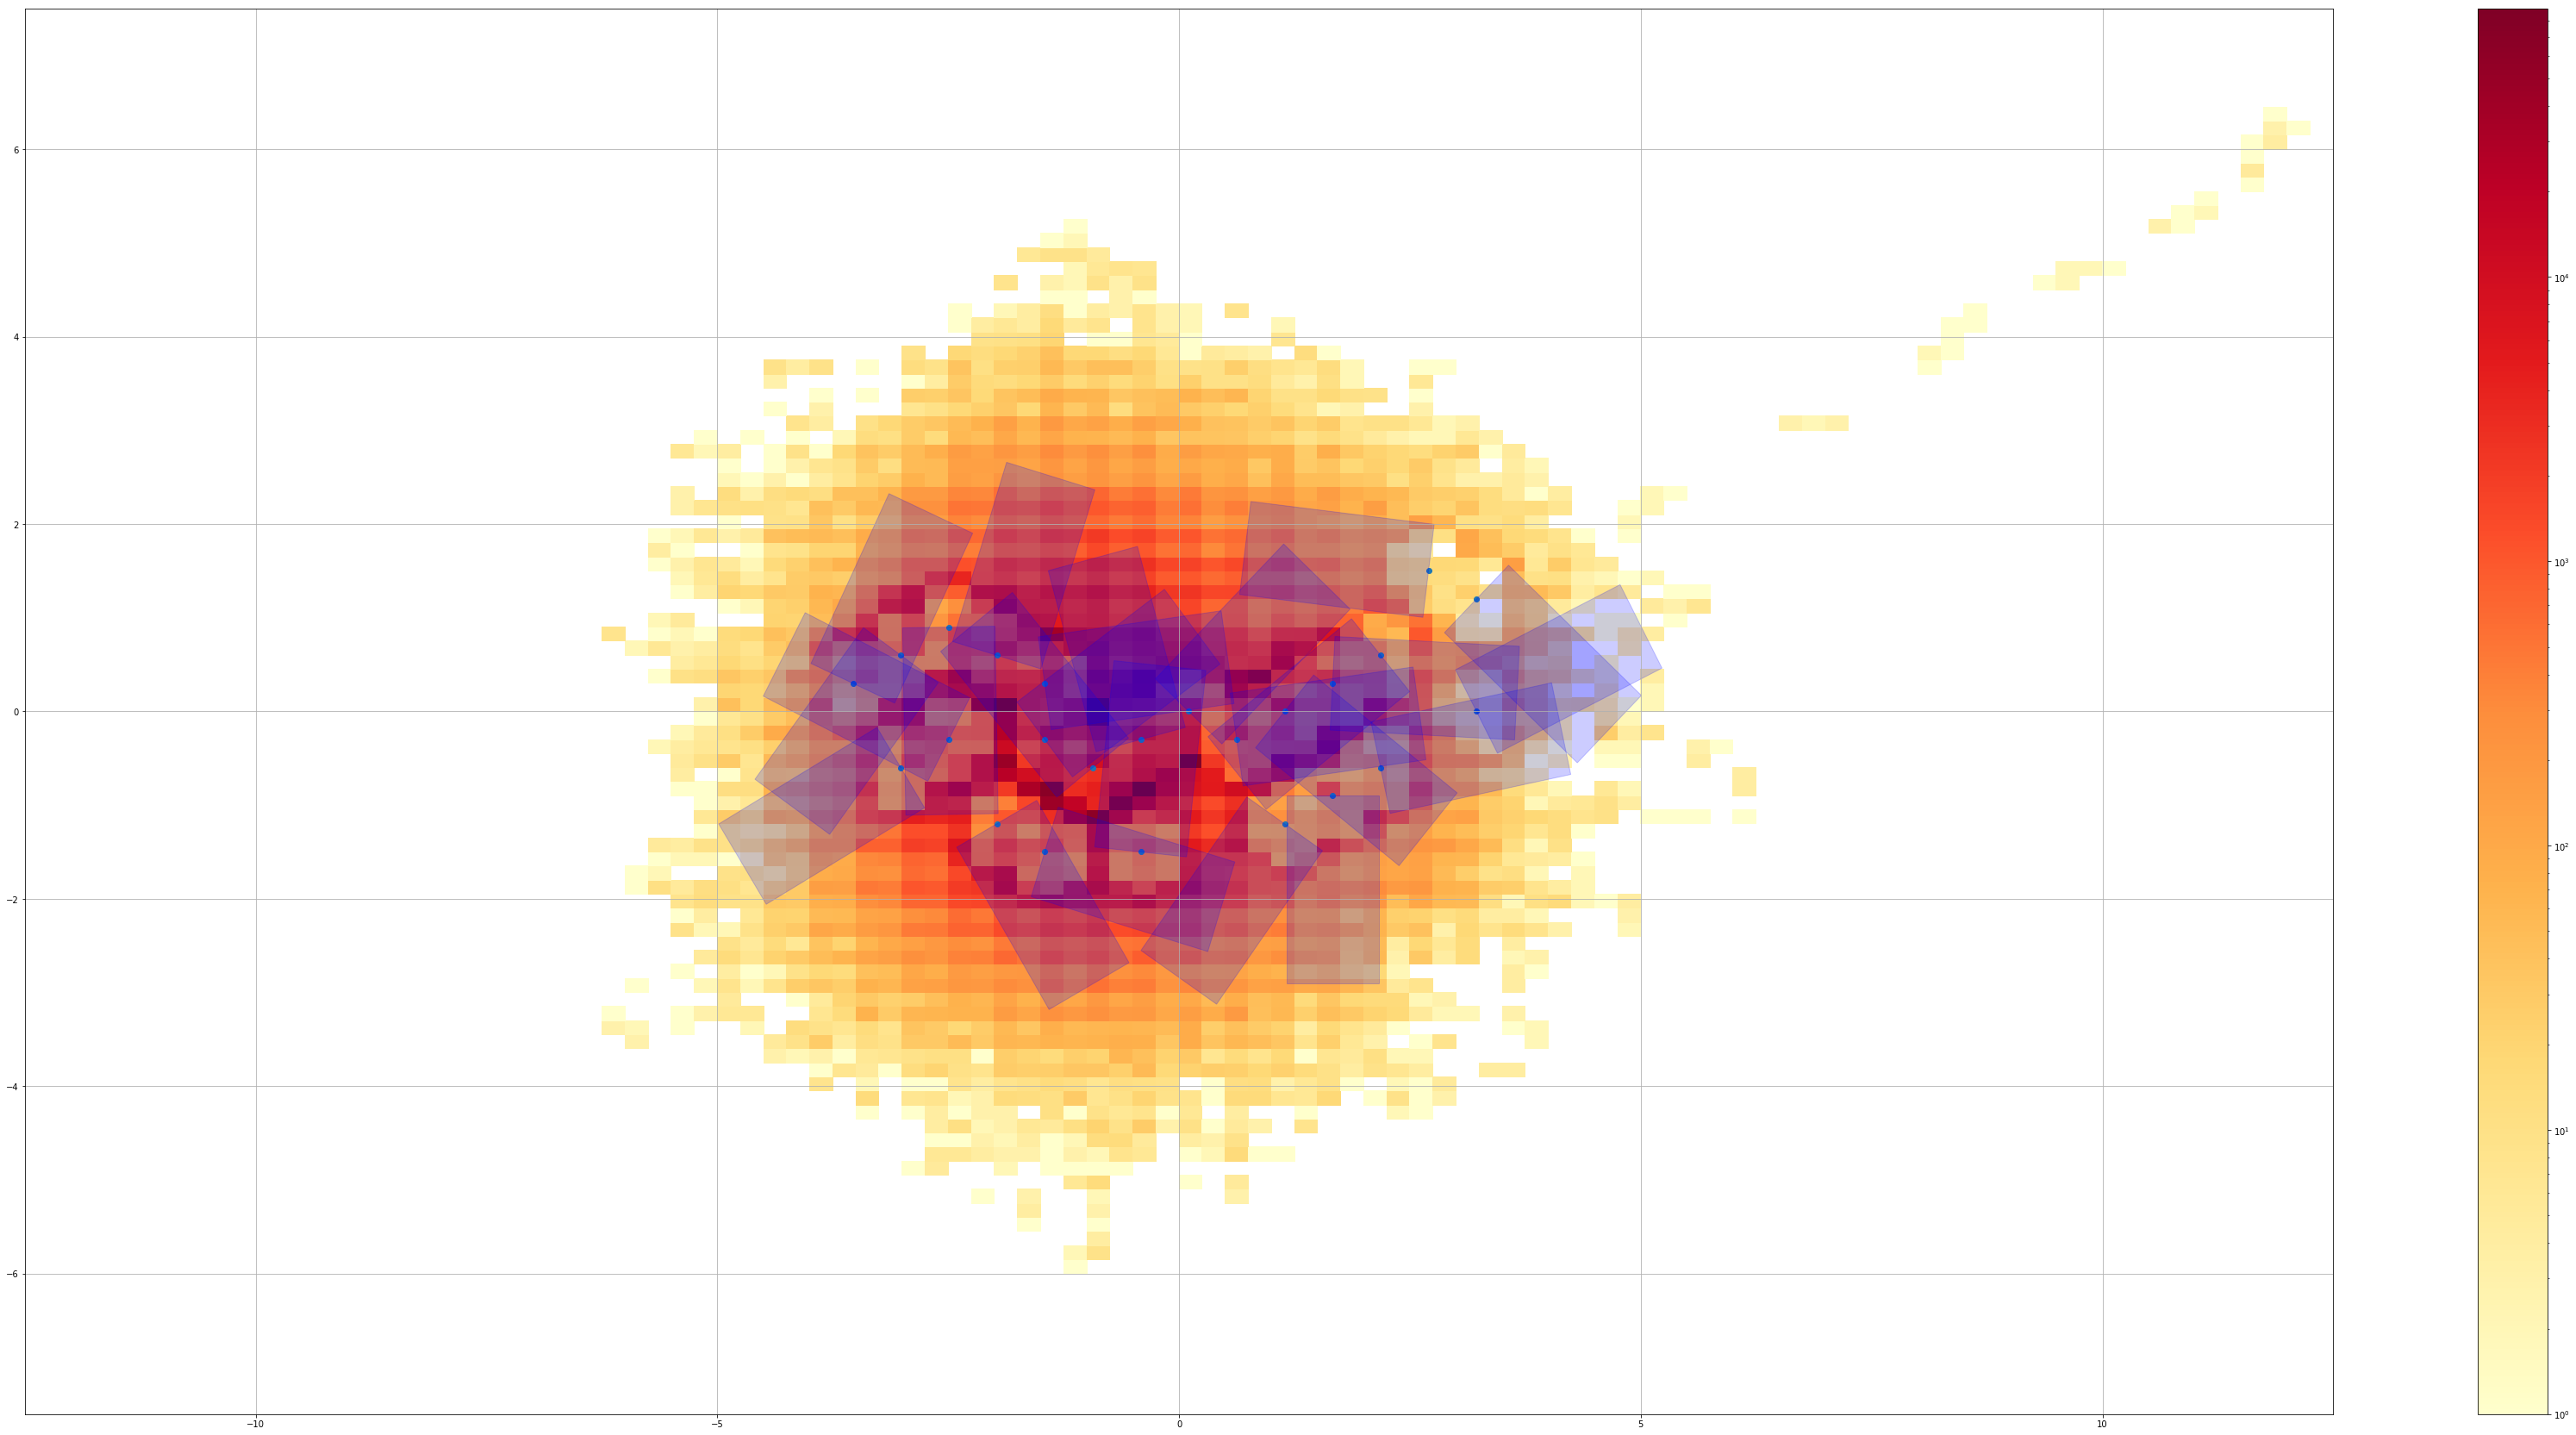

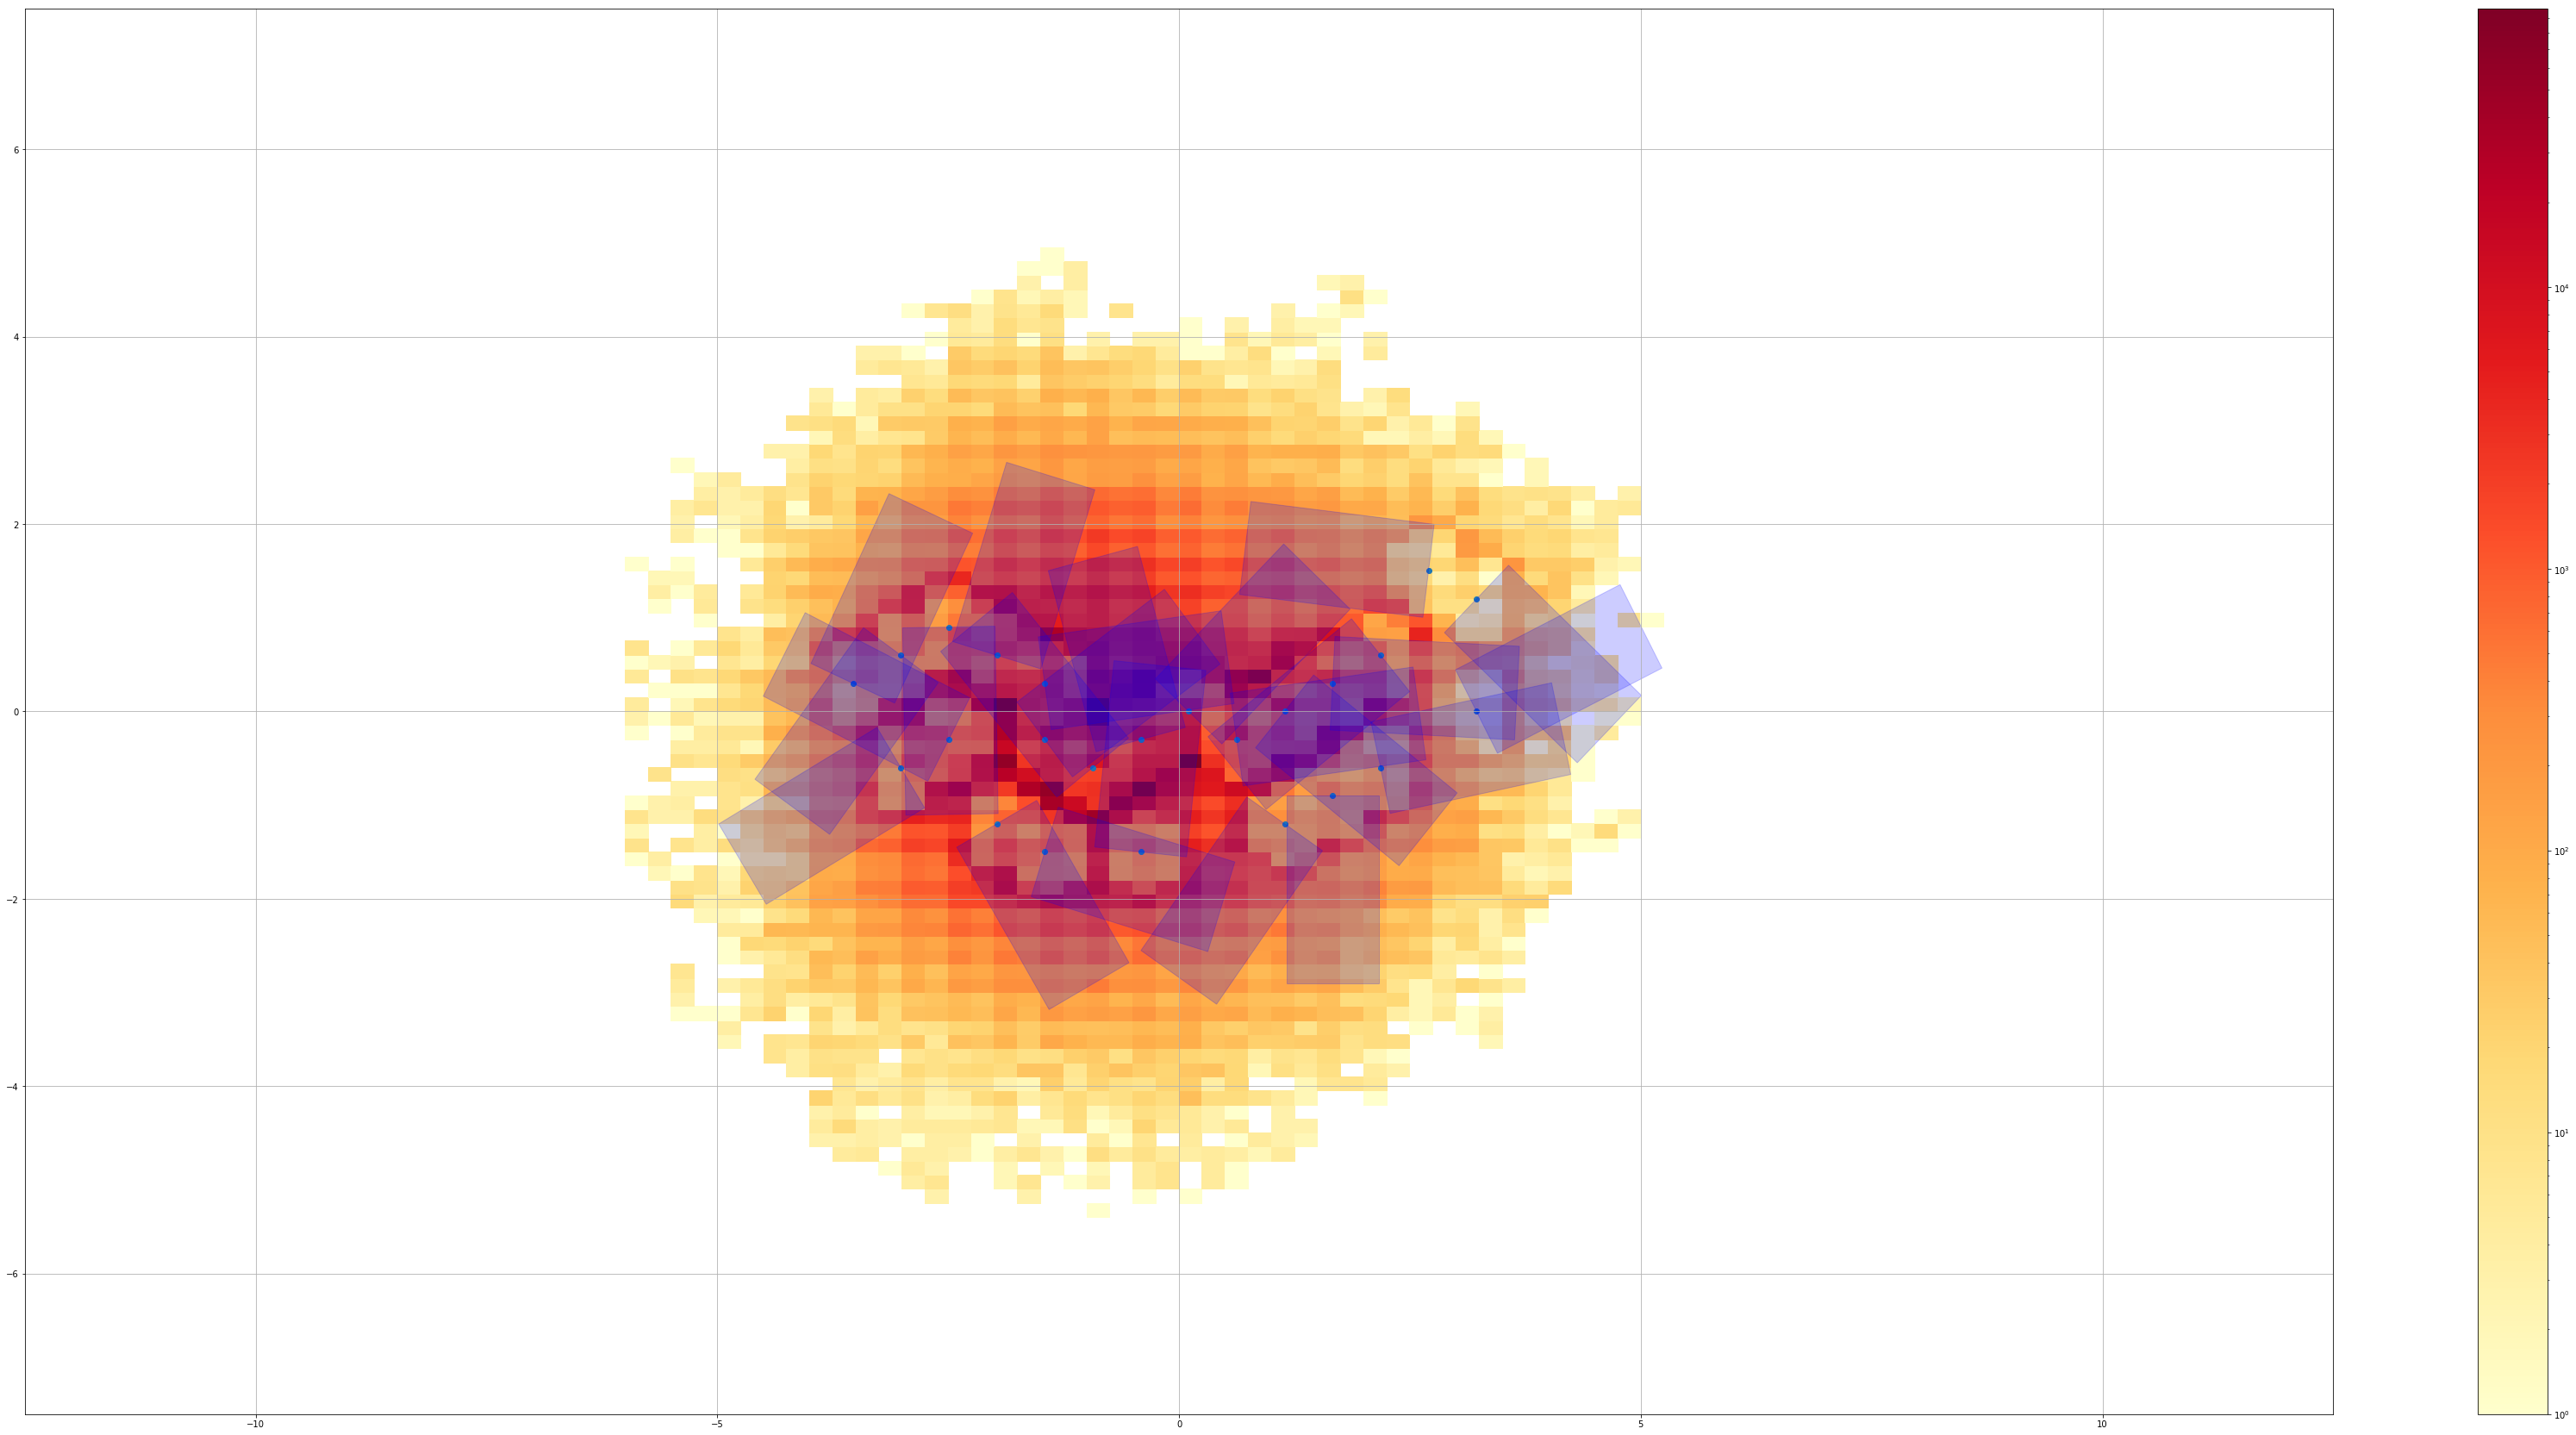

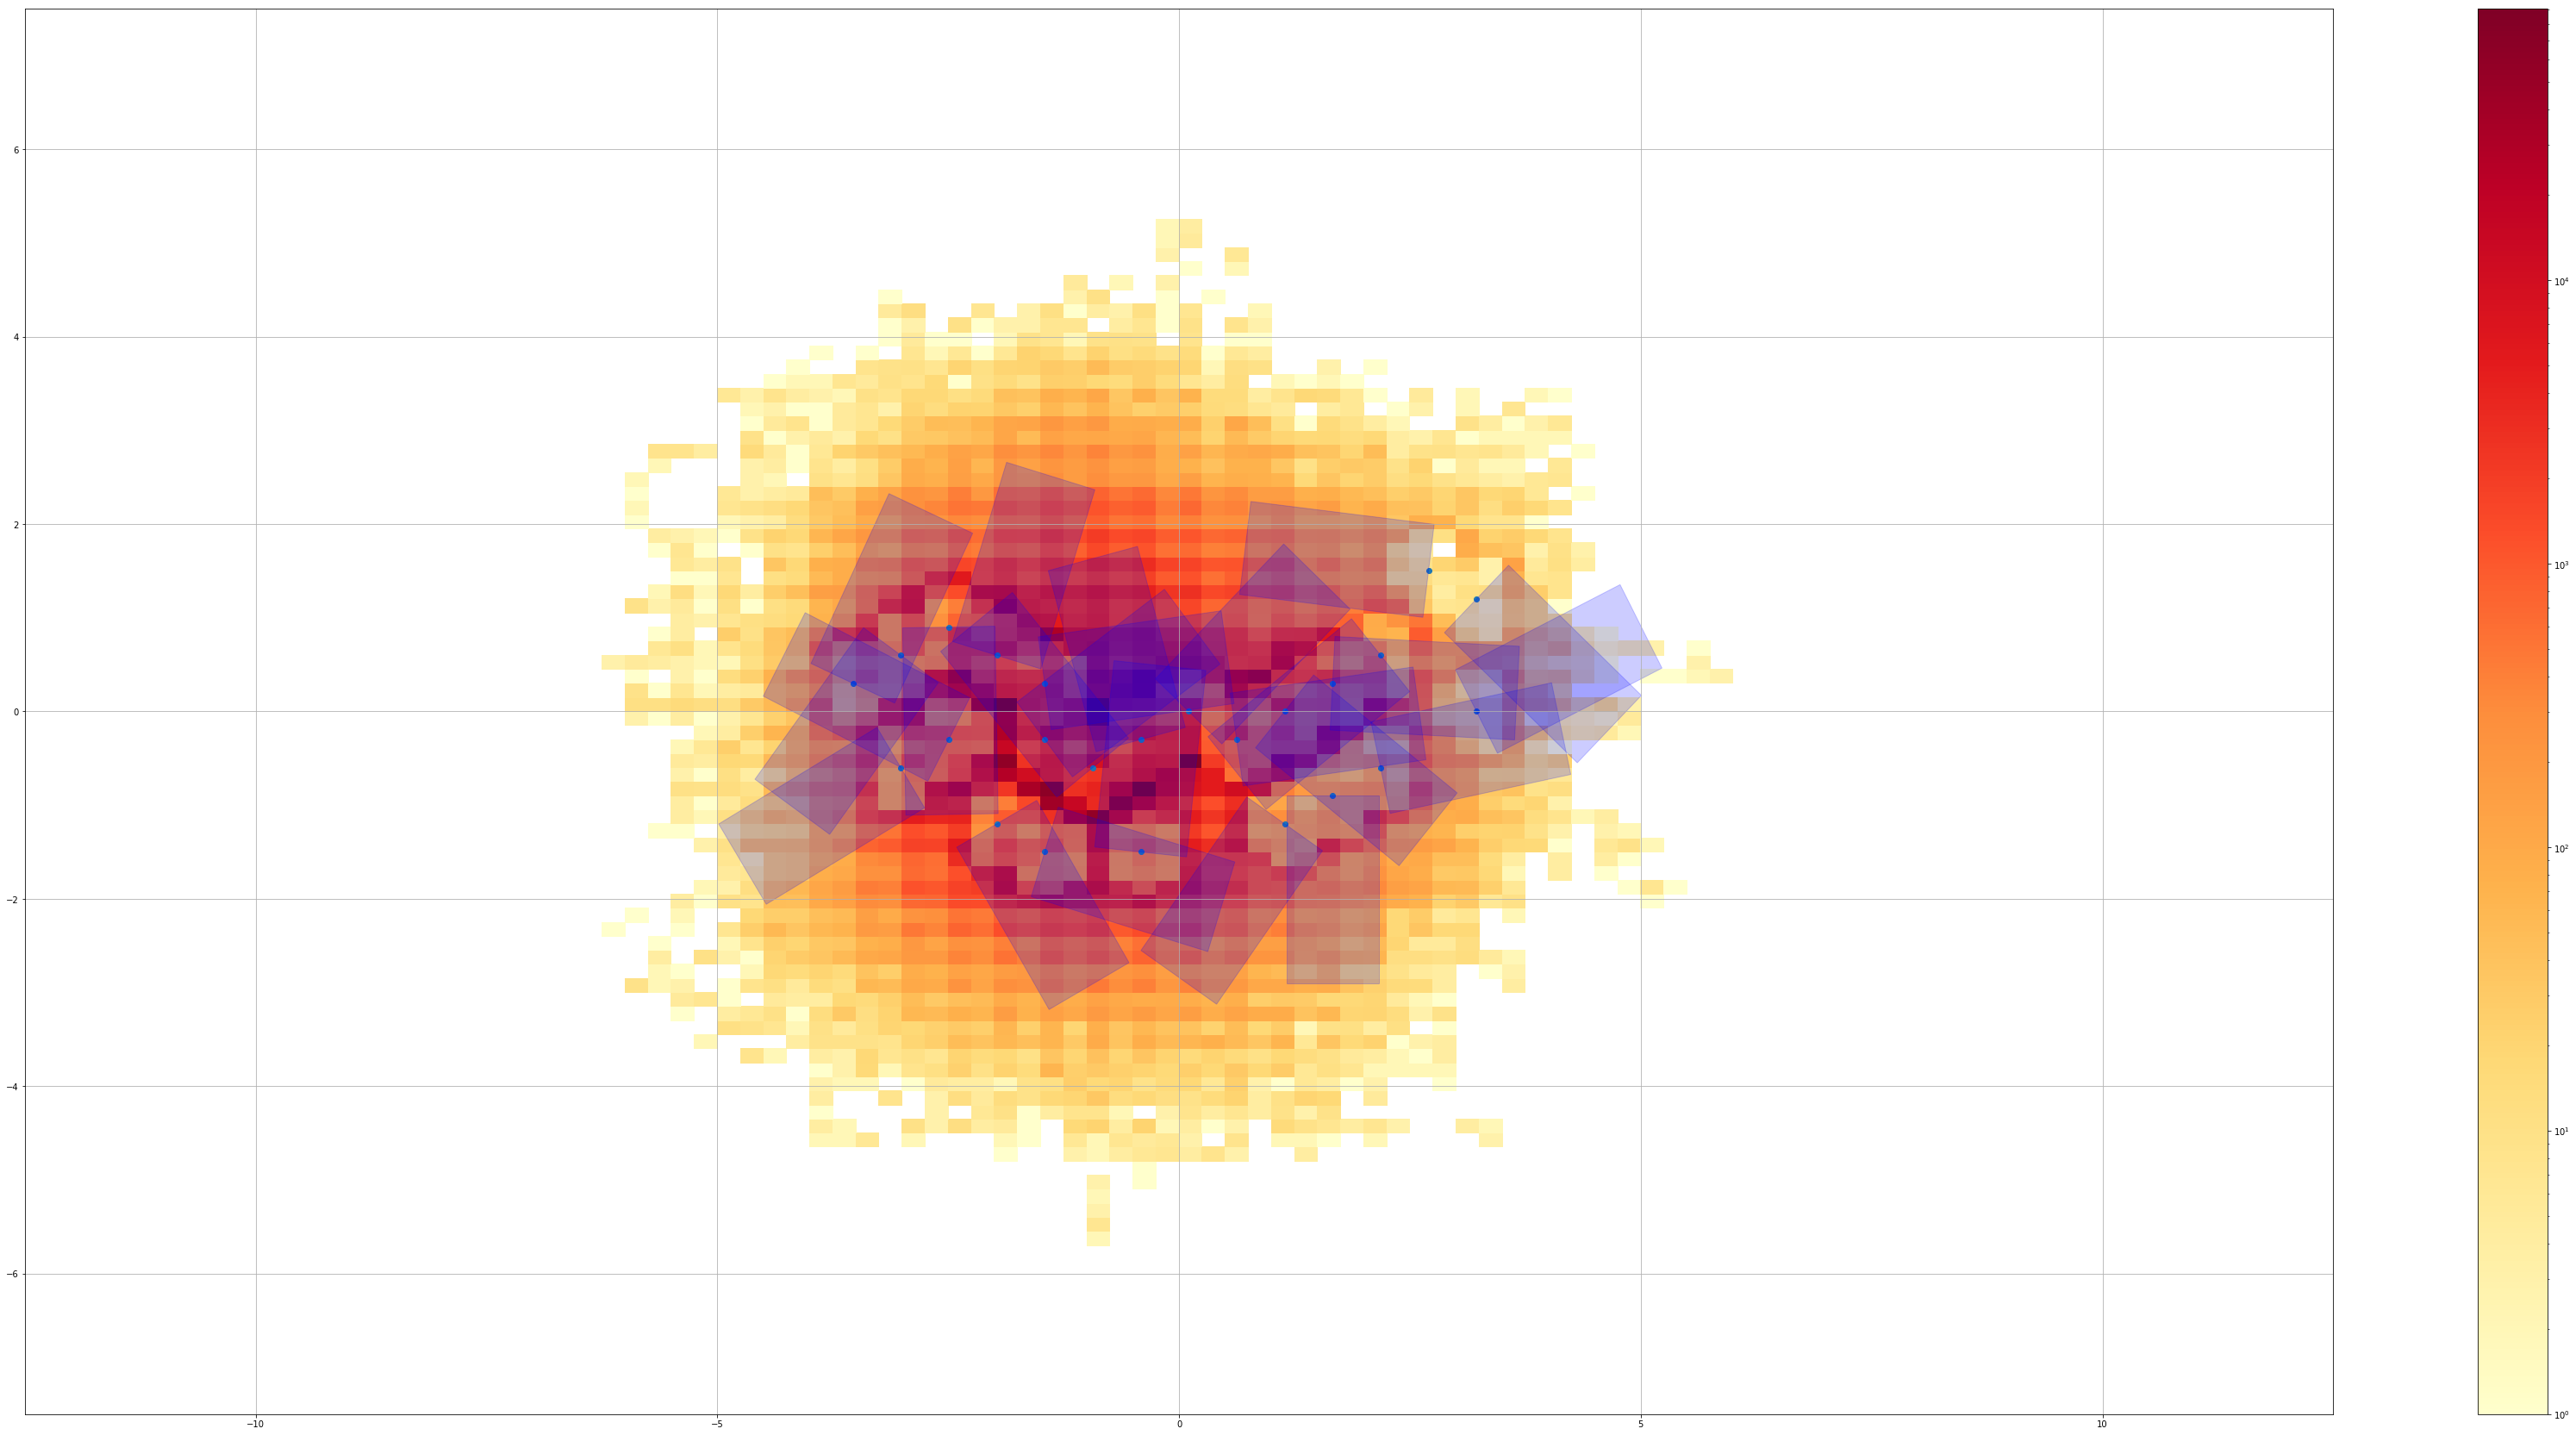

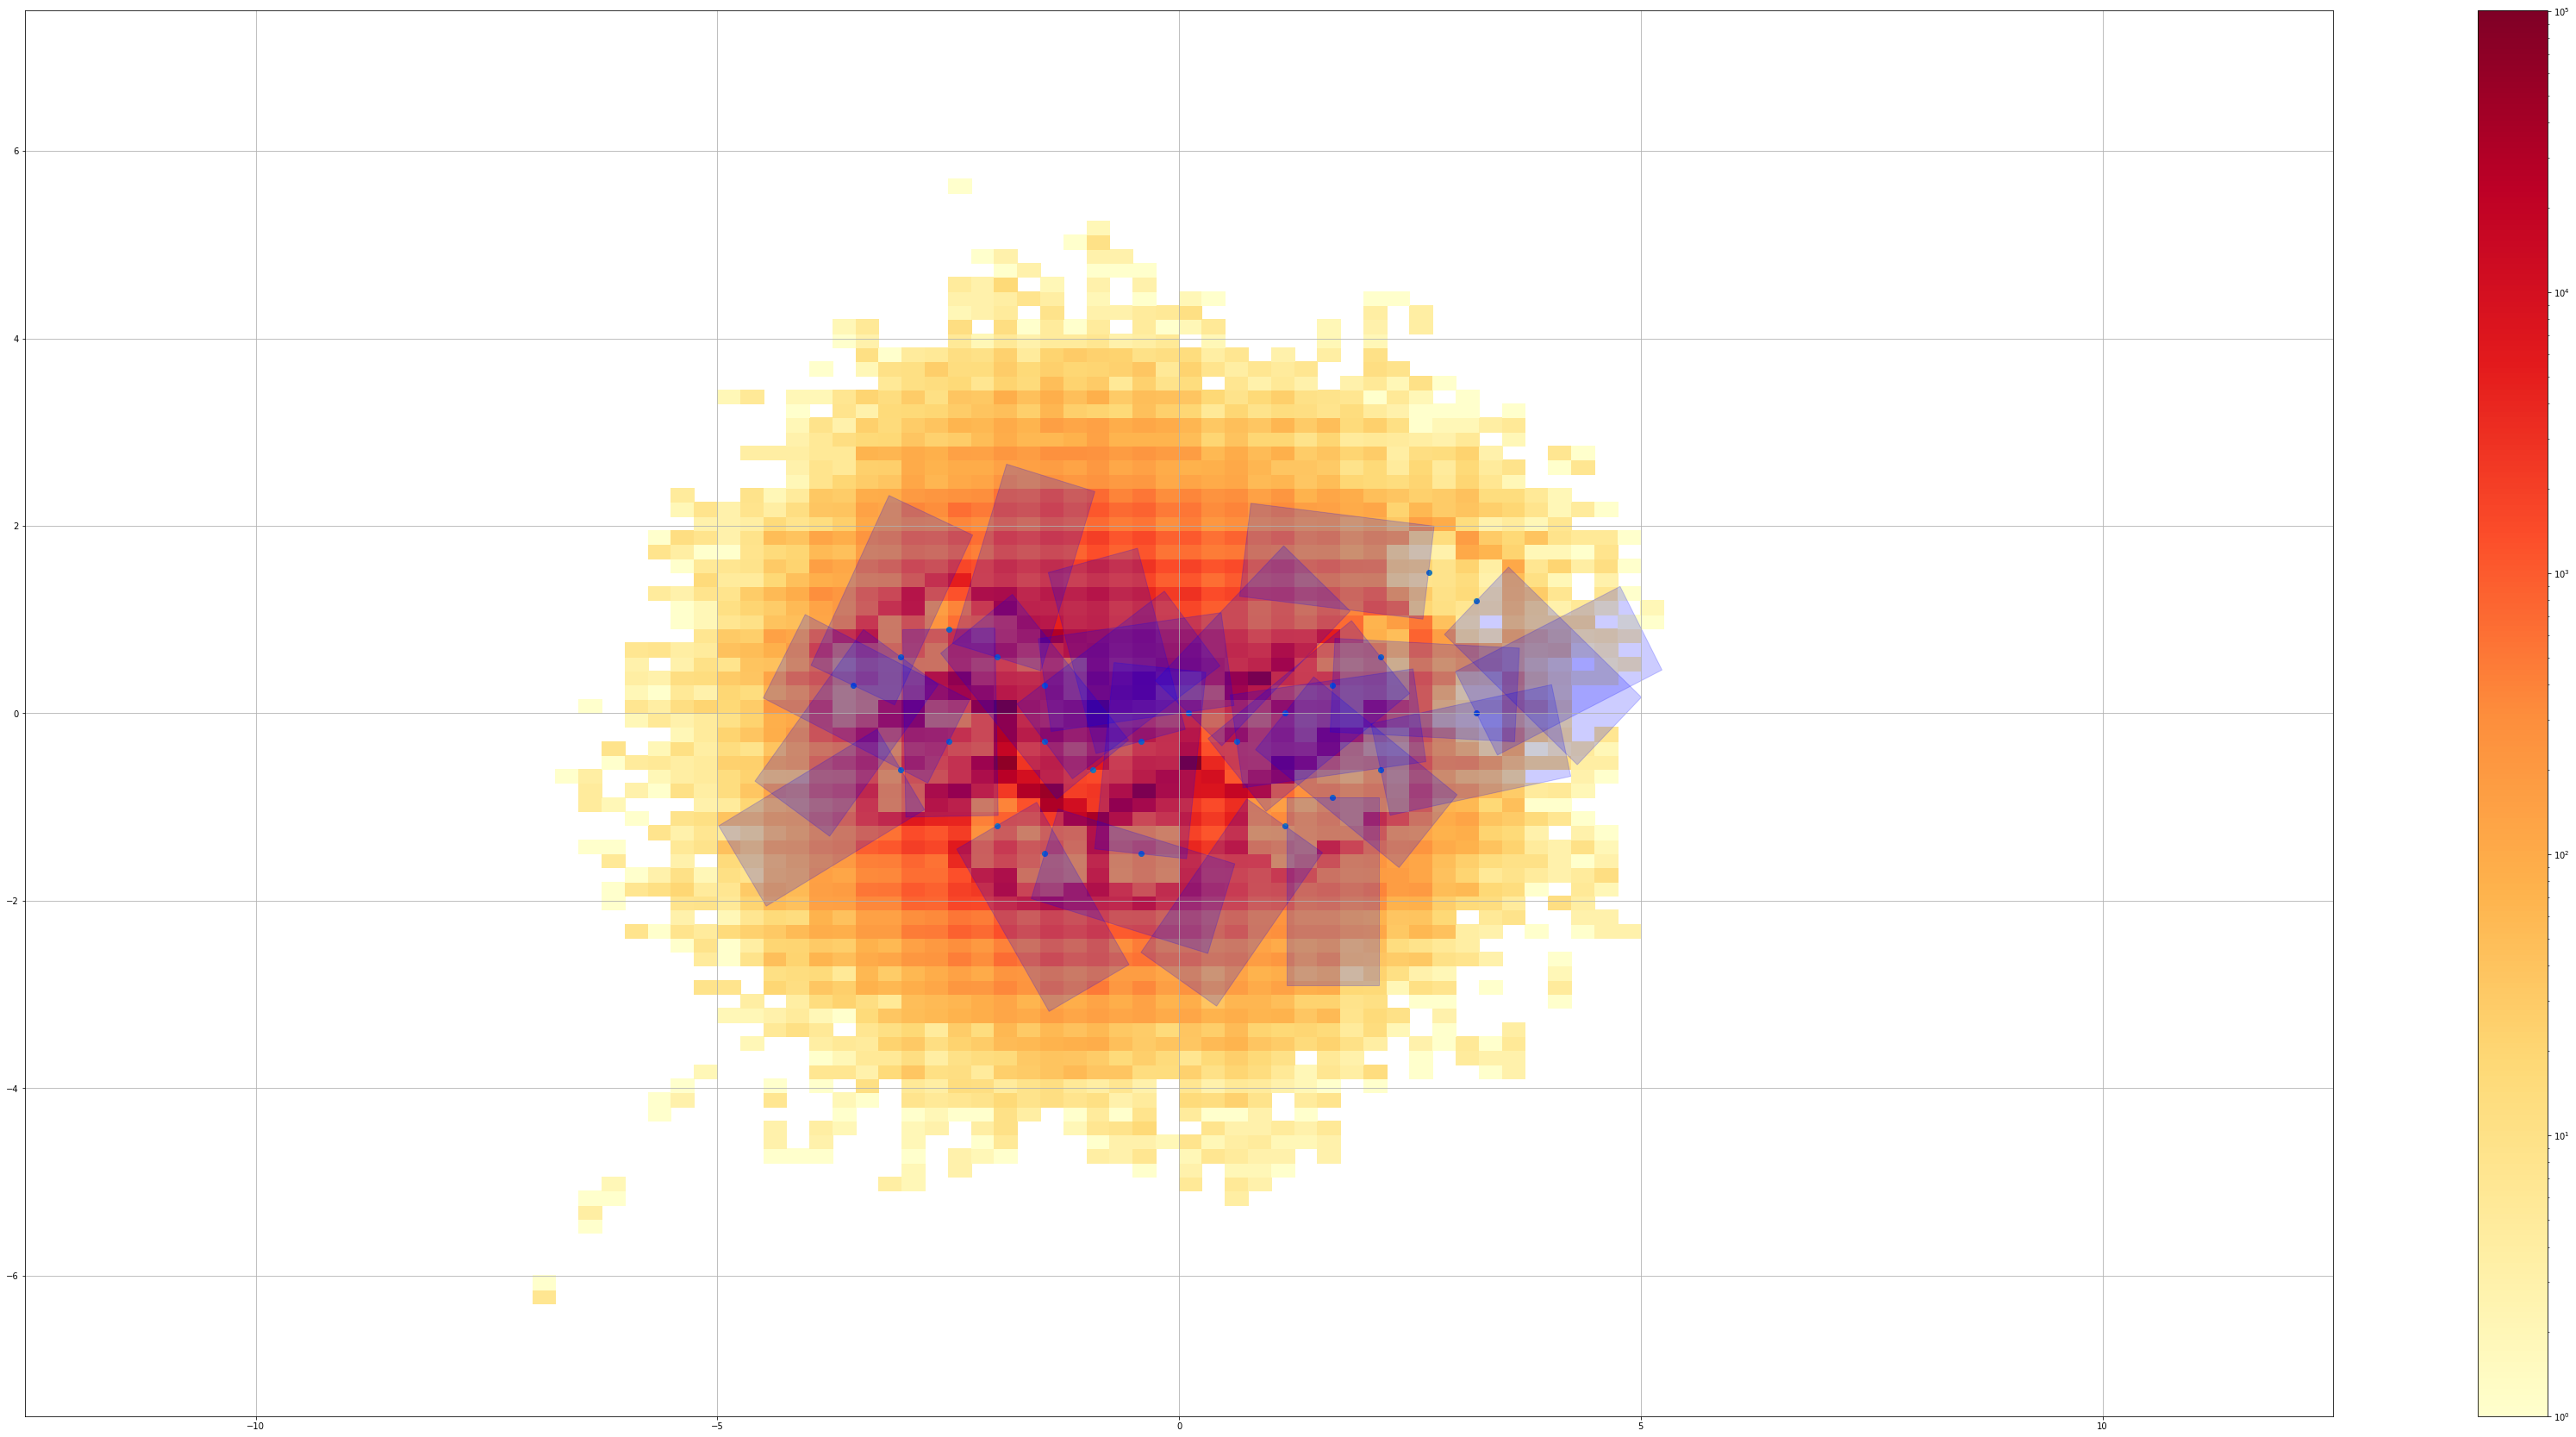

In [15]:
from matplotlib.colors import LogNorm
for v in range(5):
    
    fig = plt.figure(figsize=(60,30))
    ax = fig.add_subplot(111)

    plt.hist2d(visitor_data['Location_x_{}'.format(v+1)], visitor_data['Location_z_{}'.format(v+1)], bins=100, normed=False, range=[[-12.5,12.5],[-7.5,7.5]], cmap='YlOrRd', norm=LogNorm())
    plt.colorbar()
    plt.grid()
    plot_scene(ax)